In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import json
TOLERANCE = 1e-10
import pickle
import statistics
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, dates as mdates
from scipy.stats import skew, kurtosis, norm
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
target = 0.18
fff = pd.read_csv('/content/drive/MyDrive/_Data_/ffm.csv', index_col = "dateff", parse_dates = True)[1:]
vix = pd.read_csv('/content/drive/MyDrive/_Data_/^VIX.csv', index_col = "Date", parse_dates = True)["Adj Close"]
rf = fff["rf"]
signals = []
for value in vix.values:
  if value > 30:
    signals.append("High")
  elif 15 < value <= 30:
    signals.append("Normal")
  else:
    signals.append("Low")

In [4]:
with open("/content/drive/MyDrive/_Data_/ports_beta.json", "rb") as data:
    port_rets_beta = pickle.load(data)[:-1]

with open("/content/drive/MyDrive/_Data_/dates.json", "rb") as data:
    plot_dates = pickle.load(data)[12:]

**Full Sample**

In [5]:
excess_returns = pd.DataFrame(port_rets_beta, index = plot_dates[1:], columns = ["Strategy Returns"]) 
excess_returns["Risk Free"] = rf.values
excess_returns["Excess Returns"] = excess_returns["Strategy Returns"] - excess_returns["Risk Free"]
rets = excess_returns["Excess Returns"].values

std = statistics.pstdev(rets) * np.sqrt(12) * 100
mean = np.mean(rets) * 12 * 100
skewness = skew(rets)
kurt = kurtosis(rets)
max = np.max(rets) * 100
min = np.min(rets) * 100
std_negative = statistics.pstdev([ret for ret in rets if ret < 0])  * np.sqrt(12) * 100

print("Standard Deviation: " + str(std) + "%")
print("Average Annual Return: " + str(mean) + "%")
print("Sharpe Ratio: " + str(mean/std))
print("Sortino Ratio: " + str(mean/std_negative))
print("Largest Gain: " + str(max) + "%")
print("Largest Loss: " + str(min) + "%") 
print("Skewness: " + str(skewness))
print("Kurtosis: " + str(kurt))

Standard Deviation: 14.53648856151682%
Average Annual Return: 10.920384545746808%
Sharpe Ratio: 0.7512395101150421
Sortino Ratio: 1.0437632296758748
Largest Gain: 15.903638000383113%
Largest Loss: -22.06844820784357%
Skewness: -0.3711567411506701
Kurtosis: 3.6077761589203066


In [6]:
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

max_ret = 1
drawdowns = []
for ret in cum_rets:
  max_ret = np.max([max_ret, ret])
  drawdowns.append(-(max_ret - ret) / max_ret * 100)

df = pd.DataFrame(cum_rets, plot_dates, columns = ["Cumulative Return"])
df["Drawdown"] = drawdowns

print("Largest Drawdown: " + str(round(np.min(drawdowns), 2)) + "%")
print("Calmar Ratio: " + str(mean / -np.min(drawdowns)))

Largest Drawdown: -38.49%
Calmar Ratio: 0.2837317605474776


In [7]:
total = len(rets) - 1
positive = len([ret for ret in rets if ret > 0.0])
print("%Positive Days: " + str(positive/total * 100))

%Positive Days: 54.325259515570934


In [8]:
excess_returns["Volatility"] = signals[1:]
mean_low = np.mean(excess_returns[excess_returns["Volatility"] == "Low"]["Excess Returns"]) * 12
mean_medium = np.mean(excess_returns[excess_returns["Volatility"] == "Normal"]["Excess Returns"]) * 12
mean_high = np.mean(excess_returns[excess_returns["Volatility"] == "High"]["Excess Returns"]) * 12

std_low = excess_returns[excess_returns["Volatility"] == "Low"]["Excess Returns"].std() * np.sqrt(12)
std_medium = excess_returns[excess_returns["Volatility"] == "Normal"]["Excess Returns"].std() * np.sqrt(12)
std_high = excess_returns[excess_returns["Volatility"] == "High"]["Excess Returns"].std() * np.sqrt(12)

sharpe_low = mean_low / std_low
sharpe_medium = mean_medium / std_medium
sharpe_high = mean_high / std_high

print("Volatility     Return     Stdev    Sharpe Ratio")
print("    Low         " + str(round(mean_low, 3)) + "     " + str(round(std_low, 3)) + "       " + str(round(sharpe_low, 3)))
print("    Medium      " + str(round(mean_medium, 3)) + "     " + str(round(std_medium, 3)) + "       " + str(round(sharpe_medium, 3)))
print("    High        " + str(round(mean_high, 3)) + "     " + str(round(std_high, 3)) + "       " + str(round(sharpe_high, 3)))

Volatility     Return     Stdev    Sharpe Ratio
    Low         0.032     0.137       0.231
    Medium      0.146     0.154       0.944
    High        0.094     0.105       0.897


**First Half**

In [9]:
rets = excess_returns["Excess Returns"][:"2010"].values

std = statistics.pstdev(rets) * np.sqrt(12) * 100
mean = np.mean(rets) * 12 * 100
skewness = skew(rets)
kurt = kurtosis(rets)
max = np.max(rets) * 100
min = np.min(rets) * 100
std_negative = statistics.pstdev([ret for ret in rets if ret < 0])  * np.sqrt(12) * 100

print("Standard Deviation: " + str(std) + "%")
print("Average Annual Return: " + str(mean) + "%")
print("Sharpe Ratio: " + str(mean/std))
print("Sortino Ratio: " + str(mean/std_negative))
print("Largest Gain: " + str(max) + "%")
print("Largest Loss: " + str(min) + "%") 
print("Skewness: " + str(skewness))
print("Kurtosis: " + str(kurt))

Standard Deviation: 13.220658499776622%
Average Annual Return: 20.950879237431593%
Sharpe Ratio: 1.5847076934772637
Sortino Ratio: 2.567369989745059
Largest Gain: 15.903638000383113%
Largest Loss: -12.208398016040343%
Skewness: 0.24655313830870834
Kurtosis: 2.0219244694995204


In [10]:
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

max_ret = 1
drawdowns = []
for ret in cum_rets:
  max_ret = np.max([max_ret, ret])
  drawdowns.append(-(max_ret - ret) / max_ret * 100)

df = pd.DataFrame(cum_rets, plot_dates[:144], columns = ["Cumulative Return"])
df["Drawdown"] = drawdowns

print("Largest Drawdown: " + str(round(np.min(drawdowns), 2)) + "%")
print("Calmar Ratio: " + str(mean / -np.min(drawdowns)))

Largest Drawdown: -12.21%
Calmar Ratio: 1.716103882745689


In [11]:
total = len(rets) - 1
positive = len([ret for ret in rets if ret > 0.0])
print("%Positive Days: " + str(positive/total * 100))

%Positive Days: 62.676056338028175


**Second Half**

In [12]:
rets = excess_returns["Excess Returns"]["2010":].values

std = statistics.pstdev(rets) * np.sqrt(12) * 100
mean = np.mean(rets) * 12 * 100
skewness = skew(rets)
kurt = kurtosis(rets)
max = np.max(rets) * 100
min = np.min(rets) * 100
std_negative = statistics.pstdev([ret for ret in rets if ret < 0])  * np.sqrt(12) * 100

print("Standard Deviation: " + str(std) + "%")
print("Average Annual Return: " + str(mean) + "%")
print("Sharpe Ratio: " + str(mean/std))
print("Sortino Ratio: " + str(mean/std_negative))
print("Largest Gain: " + str(max) + "%")
print("Largest Loss: " + str(min) + "%") 
print("Skewness: " + str(skewness))
print("Kurtosis: " + str(kurt))

Standard Deviation: 15.190427747550078%
Average Annual Return: 1.162828485128276%
Sharpe Ratio: 0.07655008169969524
Sortino Ratio: 0.10121677557414815
Largest Gain: 12.883479098924361%
Largest Loss: -22.06844820784357%
Skewness: -0.665224538028241
Kurtosis: 4.145486150053805


In [13]:
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

max_ret = 1
drawdowns = []
for ret in cum_rets:
  max_ret = np.max([max_ret, ret])
  drawdowns.append(-(max_ret - ret) / max_ret * 100)

df = pd.DataFrame(cum_rets, plot_dates[143:], columns = ["Cumulative Return"])
df["Drawdown"] = drawdowns

print("Largest Drawdown: " + str(round(np.min(drawdowns), 2)) + "%")
print("Calmar Ratio: " + str(mean / -np.min(drawdowns)))

Largest Drawdown: -37.42%
Calmar Ratio: 0.031076424799885802


In [14]:
total = len(rets) - 1
positive = len([ret for ret in rets if ret > 0.0])
print("%Positive Days: " + str(positive/total * 100))

%Positive Days: 46.57534246575342


**Dot-com bubble crash (1998-2003)**

In [15]:
rets = excess_returns["Excess Returns"]["1998":"2004"].values

std = statistics.pstdev(rets) * np.sqrt(12) * 100
mean = np.mean(rets) * 12 * 100
skewness = skew(rets)
kurt = kurtosis(rets)
max = np.max(rets) * 100
min = np.min(rets) * 100
std_negative = statistics.pstdev([ret for ret in rets if ret < 0])  * np.sqrt(12) * 100

print("Standard Deviation: " + str(std) + "%")
print("Average Annual Return: " + str(mean) + "%")
print("Sharpe Ratio: " + str(mean/std))
print("Sortino Ratio: " + str(mean/std_negative))
print("Largest Gain: " + str(max) + "%")
print("Largest Loss: " + str(min) + "%") 
print("Skewness: " + str(skewness))
print("Kurtosis: " + str(kurt))

Standard Deviation: 15.360887465215178%
Average Annual Return: 25.900902543960523%
Sharpe Ratio: 1.686159253663779
Sortino Ratio: 2.4175267294764446
Largest Gain: 15.903638000383113%
Largest Loss: -12.208398016040343%
Skewness: -0.027109300077038254
Kurtosis: 1.7749432209172795


In [16]:
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

max_ret = 1
drawdowns = []
for ret in cum_rets:
  max_ret = np.max([max_ret, ret])
  drawdowns.append(-(max_ret - ret) / max_ret * 100)

df = pd.DataFrame(cum_rets, columns = ["Cumulative Return"])
df["Drawdown"] = drawdowns

print("Largest Drawdown: " + str(round(np.min(drawdowns), 2)) + "%")
print("Calmar Ratio: " + str(mean / -np.min(drawdowns)))

Largest Drawdown: -12.21%
Calmar Ratio: 2.121564394438149


In [17]:
total = len(rets) - 1
positive = len([ret for ret in rets if ret > 0.0])
print("%Positive Days: " + str(positive/total * 100))

%Positive Days: 68.57142857142857


**2007-2008 Market Crash (2007-2010)**

In [18]:
rets = excess_returns["Excess Returns"]["2007":"2011"].values

std = statistics.pstdev(rets) * np.sqrt(12) * 100
mean = np.mean(rets) * 12 * 100
skewness = skew(rets)
kurt = kurtosis(rets)
max = np.max(rets) * 100
min = np.min(rets) * 100
std_negative = statistics.pstdev([ret for ret in rets if ret < 0])  * np.sqrt(12) * 100

print("Standard Deviation: " + str(std) + "%")
print("Average Annual Return: " + str(mean) + "%")
print("Sharpe Ratio: " + str(mean/std))
print("Sortino Ratio: " + str(mean/std_negative))
print("Largest Gain: " + str(max) + "%")
print("Largest Loss: " + str(min) + "%") 
print("Skewness: " + str(skewness))
print("Kurtosis: " + str(kurt))

Standard Deviation: 10.203110081542716%
Average Annual Return: 0.9503042207601102%
Sharpe Ratio: 0.09313868155545997
Sortino Ratio: 0.12413429960506195
Largest Gain: 7.020944717065096%
Largest Loss: -9.208835035161055%
Skewness: -0.32687245060142733
Kurtosis: 1.1724787119995153


In [19]:
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

max_ret = 1
drawdowns = []
for ret in cum_rets:
  max_ret = np.max([max_ret, ret])
  drawdowns.append(-(max_ret - ret) / max_ret * 100)

df = pd.DataFrame(cum_rets, columns = ["Cumulative Return"])
df["Drawdown"] = drawdowns

print("Largest Drawdown: " + str(round(np.min(drawdowns), 2)) + "%")
print("Calmar Ratio: " + str(mean / -np.min(drawdowns)))

Largest Drawdown: -21.62%
Calmar Ratio: 0.04395261552441121


In [20]:
total = len(rets) - 1
positive = len([ret for ret in rets if ret > 0.0])
print("%Positive Days: " + str(positive/total * 100))

%Positive Days: 38.297872340425535


**Covid**

In [21]:
rets = excess_returns["Excess Returns"]["2020":"2021"].values

std = statistics.pstdev(rets) * np.sqrt(12) * 100
mean = np.mean(rets) * 12 * 100
skewness = skew(rets)
kurt = kurtosis(rets)
max = np.max(rets) * 100
min = np.min(rets) * 100
std_negative = statistics.pstdev([ret for ret in rets if ret < 0])  * np.sqrt(12) * 100

print("Standard Deviation: " + str(std) + "%")
print("Average Annual Return: " + str(mean) + "%")
print("Sharpe Ratio: " + str(mean/std))
print("Sortino Ratio: " + str(mean/std_negative))
print("Largest Gain: " + str(max) + "%")
print("Largest Loss: " + str(min) + "%") 
print("Skewness: " + str(skewness))
print("Kurtosis: " + str(kurt))

Standard Deviation: 24.068407118989736%
Average Annual Return: -14.563528945484205%
Sharpe Ratio: -0.6050890228624114
Sortino Ratio: -0.597676578131817
Largest Gain: 7.7191776669620324%
Largest Loss: -22.06844820784357%
Skewness: -2.0010867483708425
Kurtosis: 4.058507312957876


In [22]:
cum_ret = 1
cum_rets = [1]
for ret in rets:
  cum_ret = cum_ret * (1 + ret)
  cum_rets.append(cum_ret)

max_ret = 1
drawdowns = []
for ret in cum_rets:
  max_ret = np.max([max_ret, ret])
  drawdowns.append(-(max_ret - ret) / max_ret * 100)

df = pd.DataFrame(cum_rets, columns = ["Cumulative Return"])
df["Drawdown"] = drawdowns

print("Largest Drawdown: " + str(round(np.min(drawdowns), 2)) + "%")
print("Calmar Ratio: " + str(mean / -np.min(drawdowns)))

Largest Drawdown: -27.63%
Calmar Ratio: -0.5271762544997998


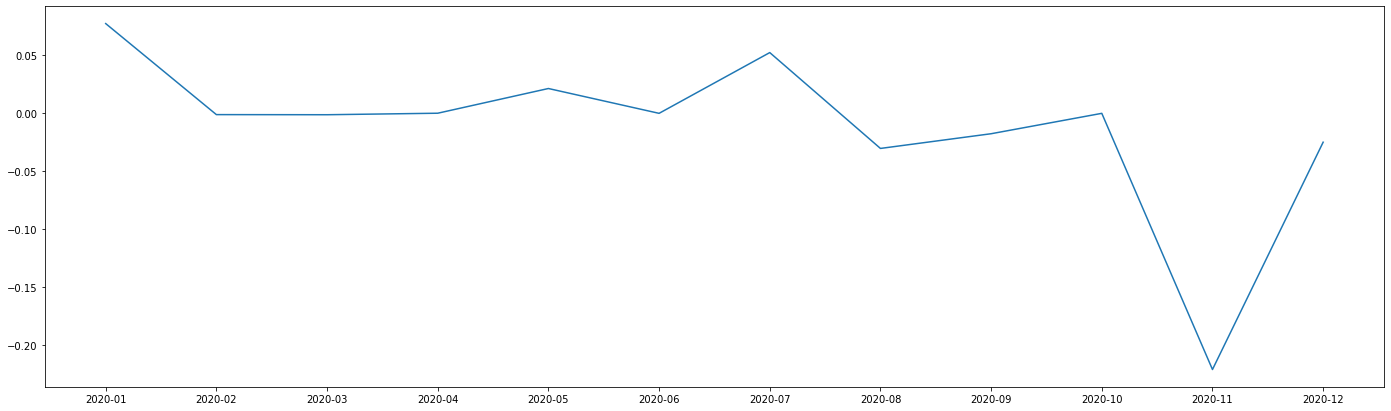

In [23]:
dates = excess_returns["Excess Returns"]["2020":"2021"].index
plt.figure(figsize=(24,7))
plt.plot(dates, rets)

**Factor Regression**

In [24]:
excess_returns = pd.DataFrame(port_rets_beta, index = plot_dates[1:], columns = ["Strategy Returns"]) 
excess_returns["Strategy Returns"] = excess_returns["Strategy Returns"] 
excess_returns["Risk Free"] = rf.values
excess_returns["Excess Returns"] = excess_returns["Strategy Returns"] - excess_returns["Risk Free"]
rets = excess_returns["Excess Returns"].values

mom = pd.read_csv('/content/drive/MyDrive/_Data_/momentum.csv', index_col = "dateff", parse_dates = True)[1:]

fff = fff
fff["Momentum"] = mom["umd"].values
fff["Excess Returns"] = rets

port_excess = fff["Excess Returns"]
mkt_excess = fff["mktrf"]
exp_var = pd.DataFrame()
exp_var["Market - Rf"] = mkt_excess.copy()
exp_var["Constant"] = 1
exp_var["Value"] = fff["hml"]
exp_var["Size"] = fff["smb"]
exp_var["Momentum"] = fff["Momentum"]
lm = sm.OLS(port_excess, exp_var).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     20.66
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.79e-15
Time:                        23:28:07   Log-Likelihood:                 545.00
No. Observations:                 290   AIC:                            -1080.
Df Residuals:                     285   BIC:                            -1062.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Market - Rf    -0.1131      0.053     -2.121      0.035      -0.218      -0.008
Constant        0.0090      0.002      4.027      0.000       0.005       0.013
Value           0.0309      0.068      0.452      0.652      -0.104       0.165
Size           -0.1261      0.071     -1.784      0.075      -0.265       0.013
Momentum        0.3293      0.047      7.021      0.000       0.237       0.422
==============================================================================
Omnibus:                       15.454   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.904
Skew:                           0.035   Prob(JB):                     1.31e-09
Kurtosis:                       4.839   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
replicating_port = excess_returns["Strategy Returns"].values - lm.params[0]*(fff['mktrf'].values + fff['rf'].values) -(1-lm.params[0])*fff['rf'].values -lm.params[2]*fff['hml'].values-lm.params[3]*fff['smb'].values-lm.params[4]*fff['Momentum'].values

In [26]:
te = replicating_port.std() 
alpha = np.mean(replicating_port) 
IR = alpha * 12 / (te * np.sqrt(12))

print("Information Ratio: " + str(IR))

Information Ratio: 0.8422181017209348


**Transaction Costs**

In [27]:
excess_returns = pd.DataFrame(port_rets_beta, index = plot_dates[1:], columns = ["Strategy Returns"]) 
excess_returns["Strategy Returns"] = excess_returns["Strategy Returns"] - 0.00461
excess_returns["Risk Free"] = rf.values
excess_returns["Excess Returns"] = excess_returns["Strategy Returns"] - excess_returns["Risk Free"]
rets = excess_returns["Excess Returns"].values

mom = pd.read_csv('/content/drive/MyDrive/_Data_/momentum.csv', index_col = "dateff", parse_dates = True)[1:]

fff = fff
fff["Momentum"] = mom["umd"].values
fff["Excess Returns"] = rets

port_excess = fff["Excess Returns"]
mkt_excess = fff["mktrf"]
exp_var = pd.DataFrame()
exp_var["Market - Rf"] = mkt_excess.copy()
exp_var["Constant"] = 1
exp_var["Value"] = fff["hml"]
exp_var["Size"] = fff["smb"]
exp_var["Momentum"] = fff["Momentum"]
lm = sm.OLS(port_excess, exp_var).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     20.66
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.79e-15
Time:                        23:28:07   Log-Likelihood:                 545.00
No. Observations:                 290   AIC:                            -1080.
Df Residuals:                     285   BIC:                            -1062.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Market - Rf    -0.1131      0.053     -2.121      0.035      -0.218      -0.008
Constant        0.0044      0.002      1.960      0.051   -1.81e-05       0.009
Value           0.0309      0.068      0.452      0.652      -0.104       0.165
Size           -0.1261      0.071     -1.784      0.075      -0.265       0.013
Momentum        0.3293      0.047      7.021      0.000       0.237       0.422
==============================================================================
Omnibus:                       15.454   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.904
Skew:                           0.035   Prob(JB):                     1.31e-09
Kurtosis:                       4.839   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Historical VaR**

In [28]:
rets = sorted(excess_returns["Excess Returns"].values)
length = len(rets)
index = round(length / 100, 0) - 1

var = rets[int(index)]

print("Historical VaR: " + str(var * 100) + "%")

Historical VaR: -12.054712255068779%


**Sharpe Ratio across time**

In [29]:
years = range(1998, 2023)
srs = []

for i in range(len(years)-1):
  rets = excess_returns['Excess Returns'][str(years[i]) : str(years[i+1])]
  mean = np.mean(rets)
  std = statistics.pstdev(rets)
  sr = mean/std * np.sqrt(12)
  srs.append(sr)

  print(str(years[i]) + ": " + str(sr))


rets = excess_returns['Excess Returns']["2022" : ]
mean = np.mean(rets)
std = statistics.pstdev(rets)
sr = mean/std * np.sqrt(12)
srs.append(sr)

print("2022: " + str(sr))

1998: 2.3881497168734844
1999: 2.3335709945507097
2000: 1.345257785944834
2001: 0.7849312832075737
2002: 1.1336813858133297
2003: 0.31853338652444235
2004: 1.2282288543191175
2005: 3.8657037864631327
2006: 0.1357988894812796
2007: 1.6687765053502315
2008: -0.44423146245584394
2009: -1.2129511066619512
2010: -1.9555099069148647
2011: -0.4655202113530596
2012: -1.5548390345048626
2013: -1.9688104380189733
2014: 0.09545151372344497
2015: 0.7422648448241973
2016: -1.5872078790781063
2017: 0.4376493917018425
2018: 1.5522073579972042
2019: -0.6015620767097203
2020: -0.8349338967940686
2021: 0.7710477420270541
2022: 4.119094490702848


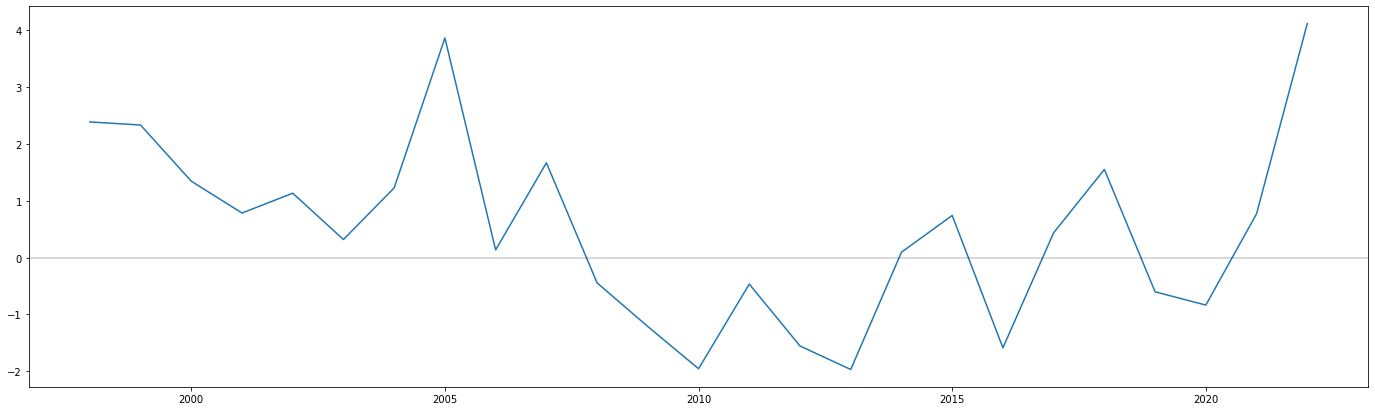

In [30]:
df = pd.DataFrame(srs, index = years)
plt.figure(figsize=(24,7))
plt.plot(df)
plt.axhline(y=0, color = "black", alpha = 0.2)